# Predicting Fuel Efficiency of Vehicles

we'd be going from data collection to deploying the Machine Learning model:

1. **Data Collection** - using the classic [Auto MPG dataset](http://archive.ics.uci.edu/ml/datasets/Auto+MPG) from UCI ML Repository.
2. **Define Problem Statement** - defining the problem based on the dataset description and initial exploration.
3. **EDA** - Carry our exploratory analysis to figure out the important features and creating new combination of features.
4. **Data Preparation** - Using step 4, create a pipeline of tasks to transform the data to be loaded into our ML models.
5. **Selecting and Training ML models** - Training a few models to evaluate their predictions using cross-validation.
6. **Hyperparameter Tuning** - Fine tune the hyperparameters for the models that showed promising results.


### Step 1: Collecting Data from UCI ML repository

In [175]:
# !wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [176]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [177]:
# reading the .data file using pandas

cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

In [178]:
data.sample(20)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
197,29.0,4,90.0,70.0,1937.0,14.2,76,2
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
15,22.0,6,198.0,95.0,2833.0,15.5,70,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,1
192,22.0,6,250.0,105.0,3353.0,14.5,76,1
182,28.0,4,107.0,86.0,2464.0,15.5,76,2
288,18.2,8,318.0,135.0,3830.0,15.2,79,1
228,18.5,6,250.0,98.0,3525.0,19.0,77,1


### Step 2: Problem Statement:

The data contains MPG variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle in 70s and 80s.

Our aim here is to **predict the MPG value for a vehicle** given we have other attributes of that vehicle.

### Step 3: Exploratory Data Analysis

1. Check for Data type of columns
2. Check for null values.
3. Check for outliers
4. Look for the category distribution in categorical columns
5. Plot for correlation
6. Look for new variables

In [179]:
##checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [180]:
##checking for all the null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [181]:
##summary statistics of quantitative variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<Axes: xlabel='Horsepower'>

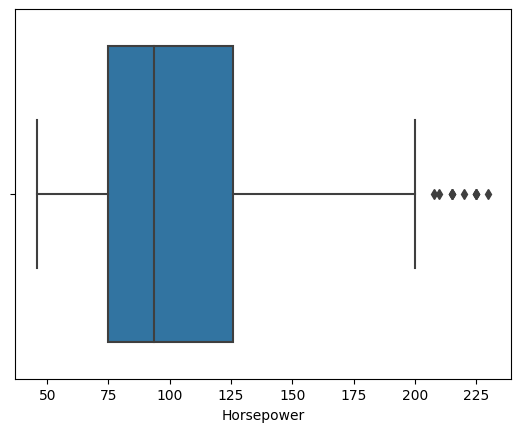

In [182]:
sns.boxplot(x=data['Horsepower'])

In [183]:
##imputing the values with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [184]:
##category distribution
data["Cylinders"].value_counts() / len(data)

Cylinders
4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: count, dtype: float64

In [185]:
data['Origin'].value_counts()

Origin
1    249
3     79
2     70
Name: count, dtype: int64

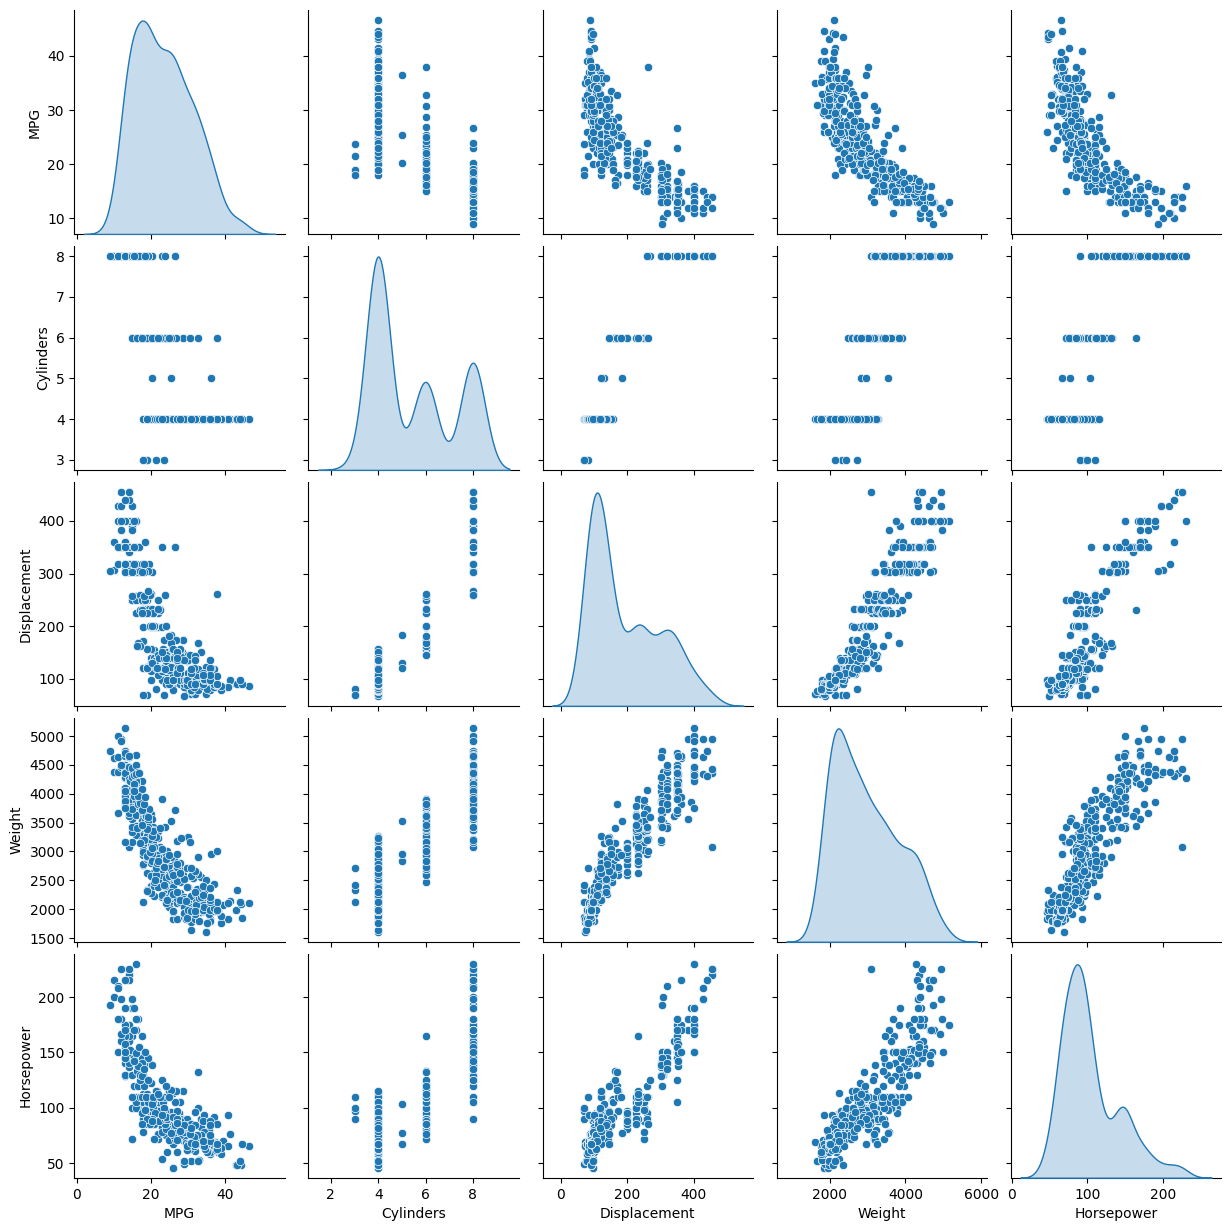

In [186]:
##pairplots to get an intuition of potential correlations
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")


### Setting aside Test Set

In [187]:
# set aside the test data
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

test_set.shape

(80, 8)

In [188]:
train_set['Cylinders'].value_counts() / len(train_set)

Cylinders
4    0.509434
8    0.248428
6    0.220126
3    0.012579
5    0.009434
Name: count, dtype: float64

In [189]:
test_set["Cylinders"].value_counts() / len(test_set)

Cylinders
4    0.525
8    0.300
6    0.175
Name: count, dtype: float64

### Stratified Sampling

In [190]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [191]:
strat_test_set.shape

(80, 8)

In [192]:
##checking for cylinder category distribution in training set
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

Cylinders
4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: count, dtype: float64

In [193]:
##checking for cylinder category distribution in testing set
strat_test_set["Cylinders"].value_counts() / len(strat_test_set)

Cylinders
4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: count, dtype: float64

In [194]:
##converting integer classes to countries in Origin column
train_set['Origin'] = train_set['Origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
train_set.sample(10)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
174,18.0,6,171.0,97.0,2984.0,14.5,75,India
201,18.5,6,250.0,110.0,3645.0,16.2,76,India
115,15.0,8,350.0,145.0,4082.0,13.0,73,India
363,22.4,6,231.0,110.0,3415.0,15.8,81,India
87,13.0,8,350.0,145.0,3988.0,13.0,73,India
67,11.0,8,429.0,208.0,4633.0,11.0,72,India
356,32.4,4,108.0,75.0,2350.0,16.8,81,Germany
253,20.5,6,200.0,95.0,3155.0,18.2,78,India
259,20.8,6,200.0,85.0,3070.0,16.7,78,India
100,18.0,6,250.0,88.0,3021.0,16.5,73,India


In [195]:
##one hot encoding
train_set = pd.get_dummies(train_set, prefix='', prefix_sep='')
train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,True,False
18,27.0,4,97.0,88.0,2130.0,14.5,70,True,False,False
376,37.0,4,91.0,68.0,2025.0,18.2,82,True,False,False
248,36.1,4,91.0,60.0,1800.0,16.4,78,True,False,False
177,23.0,4,115.0,95.0,2694.0,15.0,75,False,False,True


In [196]:
data = strat_train_set.copy()

### Checking correlation matrix w.r.t. MPG

In [197]:
corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG             1.000000
Origin          0.582654
Model Year      0.577636
Acceleration    0.411989
Cylinders      -0.765693
Horsepower     -0.776055
Displacement   -0.800063
Weight         -0.822723
Name: MPG, dtype: float64

### Testing new variables by checking their correlation w.r.t. MPG

1. Displacement on Power
2. Weight on cylinder
3. Acceleration on power
4. Acceleration on cylinder

In [198]:
## testing new variables by checking their correlation w.r.t. MPG
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)


MPG                      1.000000
acceleration_on_cyl      0.718888
acceleration_on_power    0.696610
Origin                   0.582654
Model Year               0.577636
Acceleration             0.411989
weight_on_cylinder       0.002289
displacement_on_power   -0.564561
Cylinders               -0.765693
Horsepower              -0.776055
Displacement            -0.800063
Weight                  -0.822723
Name: MPG, dtype: float64

## Data Preparation

1. Handling Categorical Functions - OneHotEncoder
2. Data Cleaning - Imputer
3. Attribute Addition - Adding custom transformation
4. Setting up Data Transformation Pipeline for numerical and categorical column.

In [199]:
##handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(data)

SimpleImputer(strategy='median')

In [200]:
imputer.statistics_

array([2.23500000e+01, 4.00000000e+00, 1.46000000e+02, 9.35000000e+01,
       2.84400000e+03, 1.55000000e+01, 7.60000000e+01, 1.00000000e+00,
       1.67609819e+00, 5.45187500e+02, 1.70795455e-01, 3.50000000e+00])

In [201]:
data.median().values

array([2.23500000e+01, 4.00000000e+00, 1.46000000e+02, 9.35000000e+01,
       2.84400000e+03, 1.55000000e+01, 7.60000000e+01, 1.00000000e+00,
       1.67609819e+00, 5.45187500e+02, 1.70795455e-01, 3.50000000e+00])

In [202]:
X = imputer.transform(data)

In [203]:
data_tr = pd.DataFrame(X, columns=data.columns,
                          index=data.index)

## Data Preparation

1. Handling Categorical Attribute - OneHotEncoder
2. Data Cleaning - Imputer
3. Attribute Addition - Adding custom transformation
4. Setting up Data Transformation Pipeline for numerical and categorical column.

In [204]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [205]:
# reading the .data file using pandas

cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

### Segregating Target and Feature variables

In [206]:
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data1 = data.copy()
data


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


### Preprocessing the Origin Column

In [207]:
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df
data_tr = preprocess_origin_cols(data)
data_tr.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


### One Hot Encoding the Origin Column

In [208]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 145 to 362
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    314 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
 6   Origin        318 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ KB


In [209]:
##isolating the origin column
data_cat = data_tr[["Origin"]]
data_cat.head()

,Origin
145,Germany
151,USA
388,India
48,India
114,USA


In [210]:
##onehotencoding the categorical values
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot   # returns a sparse matrix

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [211]:
data_cat_1hot.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [212]:
cat_encoder.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

### Handling Missing values using SimpleImputer

In [213]:
##segregating the numerical columns
num_data = data.iloc[:, :-1]
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    314 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.4 KB


In [214]:
##handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(num_data)

SimpleImputer(strategy='median')

In [215]:
##median of all the columns from imputer
imputer.statistics_

array([   4. ,  146. ,   92. , 2844. ,   15.5,   76. ])

In [216]:
##median from pandas dataframe - same
data1.median().values

array([4.000e+00, 1.460e+02, 9.200e+01, 2.844e+03, 1.550e+01, 7.600e+01,
       1.000e+00])

In [217]:
##imputing the missing values by transforming the dataframe
X = imputer.transform(num_data)
X

array([[   4. ,   83. ,   61. , 2003. ,   19. ,   74. ],
       [   4. ,   79. ,   67. , 2000. ,   16. ,   74. ],
       [   4. ,  156. ,   92. , 2585. ,   14.5,   82. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  113. ,   95. , 2372. ,   15. ,   70. ],
       [   6. ,  146. ,  120. , 2930. ,   13.8,   81. ]])

In [218]:
##converting the 2D array back into a dataframe
data_tr = pd.DataFrame(X, columns=num_data.columns,
                          index=num_data.index)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    float64
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    float64
dtypes: float64(6)
memory usage: 17.4 KB


### Adding Attributes using BaseEstimator and Transformer

In [219]:
num_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
145,4,83.0,61.0,2003.0,19.0,74
151,4,79.0,67.0,2000.0,16.0,74
388,4,156.0,92.0,2585.0,14.5,82
48,6,250.0,88.0,3139.0,14.5,71
114,4,98.0,90.0,2265.0,15.5,73


In [220]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([4.0000000e+00, 8.3000000e+01, 6.1000000e+01, 2.0030000e+03,
       1.9000000e+01, 7.4000000e+01, 3.1147541e-01, 4.7500000e+00])

### Creating a Pipeline of tasks

In [221]:
##Using Pipeline class
from sklearn.pipeline import Pipeline
##Using StandardScaler to scale all the numerical attributes
from sklearn.preprocessing import StandardScaler

numerics = ['float64', 'int64']

num_data = data_tr.select_dtypes(include=numerics)

##pipeline for numerical attributes
##imputing -> adding attributes -> scale them
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
    ])

num_data_tr = num_pipeline.fit_transform(num_data)
num_data_tr[0]

array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517])

### Transforming Numerical and Categorical Attributes

In [222]:
##Transform different columns or subsets using ColumnTransformer
from sklearn.compose import ColumnTransformer

num_attrs = list(num_data)
cat_attrs = ["Origin"]

##complete pipeline to transform 
##both numerical and cat. attributes
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attrs),
        ("cat", OneHotEncoder(), cat_attrs),
    ])

prepared_data = full_pipeline.fit_transform(data)
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517,  1.        ,  0.        ,
        0.        ])

## Selecting and Training Models

1. Select and Train a few Algorithms(Linear Regression, Decision Tree, RandomForest)
2. Evaluation using Mean Squared Error
3. Model Evaluation using Cross Validation
4. Hyperparameter Tuning using GridSearchCV
5. Check Feature Importance
6. Evaluate the Final System on test data
7. Saving the Model


In [223]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



import warnings
warnings.filterwarnings('ignore')

In [224]:
# reading the .data file using pandas

cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [225]:
##segregate the feature and target variable
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


In [226]:
##preprocess the Origin column in data
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df

In [227]:
##creating custom attribute adder class
acc_ix, hpower_ix, cyl_ix = 4,2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]

In [228]:
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline


def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

### From raw data to processed data in 2 steps

In [229]:
preprocessed_df = preprocess_origin_cols(data)
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data

array([[-0.85657842, -1.07804475, -1.15192977, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.9900351 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31547399, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53133355, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23452666, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.44003446, ...,  1.        ,
         0.        ,  0.        ]])

In [230]:
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517,  1.        ,  0.        ,
        0.        ])

### Selecting and Training Models

1. Linear Regression
2. Decision Tree
3. Random Forest
4. SVM regressor

In [231]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data_labels)

LinearRegression()

In [232]:
##testing the predictions with the 
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]

sample_data_prepared = pipeline_transformer(sample_data)

print("Prediction of samples: ", lin_reg.predict(sample_data_prepared))

Prediction of samples:  [29.08069379 27.78336755 26.08031176 12.70419279 22.23454159]


In [233]:
print("Actual Labels of samples: ", list(sample_labels))

Actual Labels of samples:  [32.0, 31.0, 26.0, 18.0, 26.0]


#### Mean Squared Error

In [234]:
from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


2.9590402225760863

### Decision Tree

In [235]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data, data_labels)

DecisionTreeRegressor()

In [236]:
mpg_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(data_labels, mpg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [237]:
## the model is ovefitting , checking by cross validation 

### Model Evaluation using Cross Validation

Scikit-Learn’s K-fold cross-validation feature randomly splits the training set into `K` distinct subsets called folds, then it trains and evaluates the model K times, picking a different fold for evaluation every time and training on the other K-1 folds. 

The result is an array containing the K evaluation scores:


In [238]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         prepared_data, 
                         data_labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)


In [239]:
tree_reg_rmse_scores

array([3.17465549, 3.14334615, 3.07225487, 3.25264316, 2.5746359 ,
       2.91751178, 3.58477684, 3.75024999, 4.15839609, 2.50843738])

In [240]:
tree_reg_rmse_scores.mean()

3.2136907647783737

In [241]:
scores = cross_val_score(lin_reg, prepared_data, data_labels, scoring="neg_mean_squared_error", cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([3.43254597, 3.45157629, 3.6621715 , 2.59652976, 2.48023405,
       2.74798115, 3.32524647, 2.42208917, 3.78133275, 2.8573747 ])

In [242]:
lin_reg_rmse_scores.mean()

3.0757081793709324

### Random Forest model

In [243]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, data_labels)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data,
                                         data_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

2.593751289055405

### Support Vector Machine Regressor

In [244]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(prepared_data, data_labels)
svm_cv_scores = cross_val_score(svm_reg, prepared_data, data_labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()



3.086591620802784

### Hyperparameter Tuning using GridSearchCV

In [245]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [246]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [247]:
cv_scores = grid_search.cv_results_

##printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)


3.6503896107177165 {'max_features': 2, 'n_estimators': 3}
3.034591272897948 {'max_features': 2, 'n_estimators': 10}
2.9431760333915586 {'max_features': 2, 'n_estimators': 30}
3.330752630027825 {'max_features': 4, 'n_estimators': 3}
2.9155903323147263 {'max_features': 4, 'n_estimators': 10}
2.7348878076741134 {'max_features': 4, 'n_estimators': 30}
3.215087099635674 {'max_features': 6, 'n_estimators': 3}
2.83124461831006 {'max_features': 6, 'n_estimators': 10}
2.6496480179781665 {'max_features': 6, 'n_estimators': 30}
2.892107024664664 {'max_features': 8, 'n_estimators': 3}
2.7941092213307996 {'max_features': 8, 'n_estimators': 10}
2.7235306532716015 {'max_features': 8, 'n_estimators': 30}
3.2223017212260694 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.9354310249807187 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.0795237654325383 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.759855758999711 {'bootstrap': False, 'max_features': 3, 'n_estima

### Checking Feature importance

In [248]:
# feature importances 

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.05634116, 0.34317858, 0.13907897, 0.25912054, 0.01611329,
       0.11023292, 0.03116881, 0.03802778, 0.00265301, 0.00250765,
       0.00157728])

In [249]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importances), reverse=True)

[('acc_on_power', 0.03116881385928645),
 ('acc_on_cyl', 0.0380277781118398),
 ('Weight', 0.2591205421474322),
 ('Model Year', 0.11023292090823404),
 ('Horsepower', 0.13907896740453968),
 ('Displacement', 0.34317858262267414),
 ('Cylinders', 0.05634116058881568),
 ('Acceleration', 0.016113291446564683)]

### Evaluating the entire system on Test Data

In [250]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()

X_test_preprocessed = preprocess_origin_cols(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [251]:
final_rmse

3.006514639541571

### Creating a function to cover this entire flow

In [252]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = preprocess_origin_cols(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred
    

In [253]:
##checking it on a random sample
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)

array([35.53666667, 17.29      , 21.65      ])

### Save the Model

In [254]:
import pickle

In [255]:
##saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [256]:
##loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)

array([35.53666667, 17.29      , 21.65      ])

In [257]:
##checking it on a random sample
vehicle_config = {
    'Cylinders': [5, 6, 8],
    'Displacement': [165.0, 160.0, 165.5],
    'Horsepower': [90.0, 130.0, 98.0],
    'Weight': [2400.0, 3150.0, 2600.0],
    'Acceleration': [20.0, 14.0, 16.0],
    'Model Year': [80, 80, 78],
    'Origin': [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)

array([27.68333333, 21.77      , 21.85666667])